In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_randoms_points(sample_size, x_min, x_max, y_min, y_max):
    x_random = (x_max - x_min) * np.random.random(sample_size) + x_min
    y_random = (y_max - y_min) * np.random.random(sample_size) + y_min
    return x_random, y_random

In [3]:
def check_if_inside(current_x, current_y, radian_l, radian_r):
    expected_y_l = current_x * math.sin(radian_l)
    expected_y_r = current_x * math.sin(radian_r)
    if (current_y <= expected_y_l) & (current_y >= expected_y_r):
        return True
    else:
        return False

In [4]:
def build_matrice_from_vectors(x_vect, y_vect):
    return [x_vect, y_vect]
    

In [5]:
def rotation_incr(theta):
    radian_theta =  math.radians(theta)
    return np.array([[math.cos(radian_theta), math.sin(radian_theta)], [math.sin(radian_theta), math.cos(radian_theta)]])

In [6]:
def rotation_points(theta, dataset):
    return np.matmul(rotation_incr(theta), dataset)

In [7]:
angle = 60
clipping_far = 200
object_sample_size = 1000
angle_radian_left = math.radians(angle/2)
x_l = clipping_far * math.cos(angle_radian_left)
y_l = clipping_far * math.sin(angle_radian_left)
left_all_points_x = [0, x_l]
left_all_points_y = [0, y_l]
left_all_points = build_matrice_from_vectors(left_all_points_x, left_all_points_y)
angle_radian_right = math.radians(math.pi - angle/2)
x_r = clipping_far * math.cos(angle_radian_right)
y_r = clipping_far * math.sin(angle_radian_right)
right_all_points_x = [0, x_r]
right_all_points_y = [0, y_r]
right_all_points = build_matrice_from_vectors(right_all_points_x, right_all_points_y)
x_random_all, y_random_all = generate_randoms_points(object_sample_size, 0, clipping_far, -clipping_far, clipping_far)
filter_points_x = []
filter_points_y = []
for x, y in zip(x_random_all, y_random_all):
        if check_if_inside(x, y, angle_radian_left, angle_radian_right) == True:
            filter_points_x.append(x)
            filter_points_y.append(y)
filter_all_points = build_matrice_from_vectors(filter_points_x, filter_points_y)            
tan_top = clipping_far * math.tan(angle_radian_left)
tan_bot = clipping_far * math.tan(angle_radian_right)
clipping_far_points_y = [tan_top, tan_bot]
clipping_far_points_x = [clipping_far, clipping_far]
clipping_far_all_points = build_matrice_from_vectors(clipping_far_points_x, clipping_far_points_y)            

In [8]:
rotation_angle = 90
rotated_left_all_points = rotation_points(rotation_angle, left_all_points)
rotated_right_all_points = rotation_points(rotation_angle, right_all_points)
rotated_filter_all_points = rotation_points(rotation_angle, filter_all_points)
rotated_clipping_far_all_points = rotation_points(rotation_angle, clipping_far_all_points)

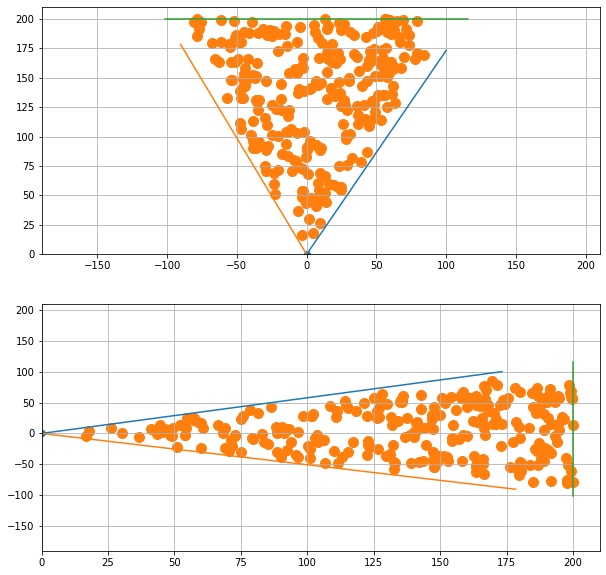

In [9]:
figure = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
ax.set_xlim(- clipping_far+10, clipping_far+10)
ax.set_ylim(0, clipping_far+10)
plt.grid(True)
plt.scatter(0, 0)
plt.plot(rotated_left_all_points[0, :], rotated_left_all_points[1, :])
plt.plot(rotated_right_all_points[0, :], rotated_right_all_points[1, :])
plt.plot(rotated_clipping_far_all_points[0, :], rotated_clipping_far_all_points[1, :])
plt.scatter(rotated_filter_all_points[0, :], rotated_filter_all_points[1, :], s=100)

ax = plt.subplot(2, 1, 2)
plt.grid(True)
ax.set_xlim(0, clipping_far+10)
ax.set_ylim(- clipping_far+10, clipping_far+10)
plt.scatter(0, 0)
plt.plot(left_all_points_x, left_all_points_y)
plt.plot(right_all_points_x, right_all_points_y)
plt.plot(clipping_far_points_x, clipping_far_points_y)
plt.scatter(filter_points_x, filter_points_y, s=100)

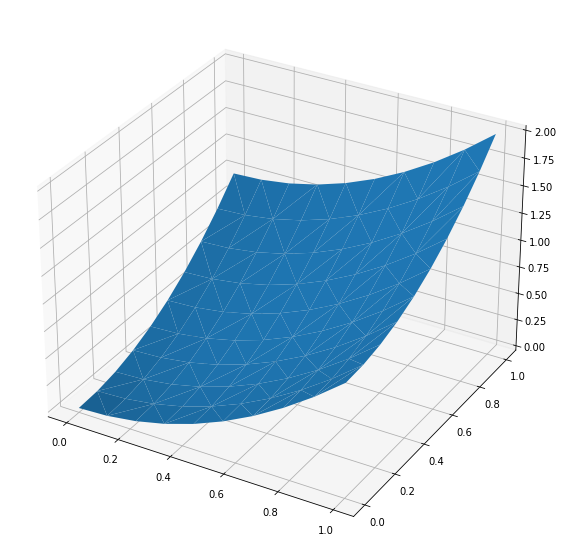

In [10]:
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
figure = plt.figure(figsize=(10, 10))
z = []
x_1d = xx.reshape(100)
y_1d = yy.reshape(100)
for xv, yv in zip(xx, yy):
    for x, y in zip(xv, yv):
        z.append(x*x+y*y)
ax = plt.subplot(1, 1, 1,  projection='3d')
ax.plot_trisurf(x_1d, y_1d, z)
ax.grid(True)

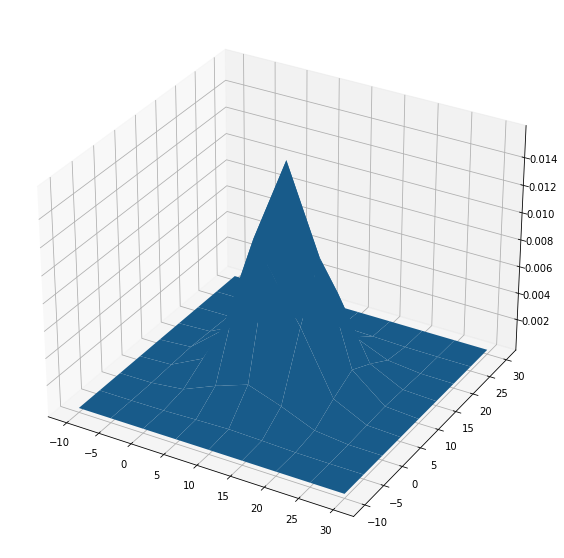

In [11]:
mean_x = 10
std_x = 5
mean_y = 10
std_y = 5
sample_size = 5
x_sample = []
y_sample = []
z_sample = []
x_sample.append(mean_x)
y_sample.append(mean_y)
for i in range(1, sample_size):
    x_sample.append(mean_x+i*std_x)
    x_sample.append(mean_x-i*std_x)
    y_sample.append(mean_y+i*std_y)
    y_sample.append(mean_y-i*std_y)    
x_sample = np.sort(np.array(x_sample))
y_sample = np.sort(np.array(y_sample))
xx, yy = np.meshgrid(x_sample, y_sample)
z_sample = 1/(std_x * std_y * np.sqrt(2 * np.pi)) * np.exp( - (xx  - mean_x)**2 / (2 * std_x**2) - (yy  - mean_y)**2 / (2 * std_y**2) )
figure = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, z_sample)
ax.grid(True)

In [12]:
https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/https://web.whatsapp.com/kernel = np.identity(20)
def compute_convolution(kernel, mask):
    data_filtered = []
    kernel_m, kernel_n = kernel.shape
    mask_m, mask_n = mask.shape
    for m in range(0, kernel_m-mask_m):
        current_filetered_raw = []
        for n in range(0, kernel_n-mask_n):        
            current_sub_kernel = kernel[m:m+mask_m,n:n+mask_n]
            current_sub_kernel_m, current_sub_kernel_n = current_sub_kernel.shape
            current_dot_matrice = current_sub_kernel*mask
            current_filetered_raw.append(current_dot_matrice.sum(axis=0).sum(axis=0))
        data_filtered.append(current_filetered_raw)
    return np.array(data_filtered)

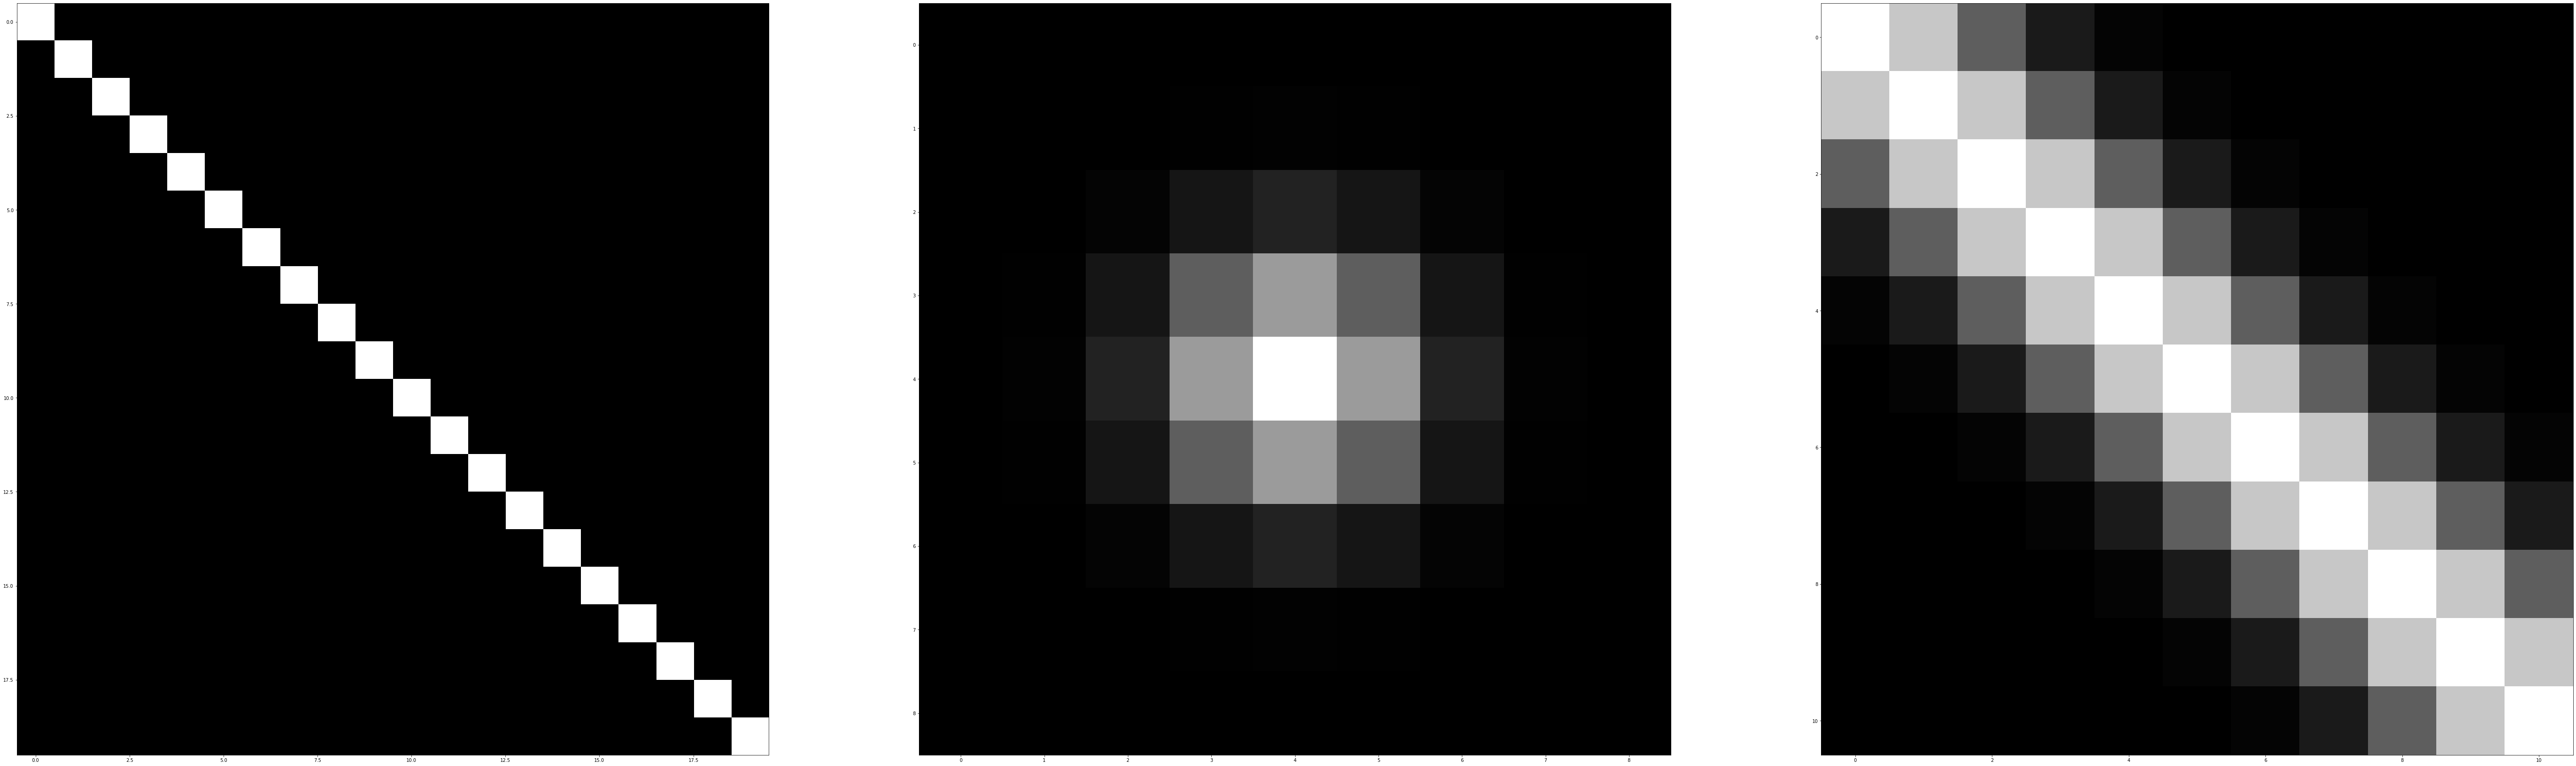

In [13]:
data_filtered = compute_convolution(kernel, z_sample)
figure = plt.figure(figsize=(100, 100))
ax = plt.subplot(131)
ax.imshow(kernel, cmap='gray')
ax = plt.subplot(132)
ax.imshow(z_sample, cmap='gray')
ax = plt.subplot(133)
ax.imshow(data_filtered, cmap='gray')

In [14]:
pixel_size = 10
h_pix = 1920
w_pix = 1080
h_size = 1920 * pixel_size
w_size = 1080 * pixel_size
square_size = 1350
camera_view_degree = 90
camera_view_radian = math.radians(camera_view_degree/2)

wall_position_data = np.array([[0, 0, 0, 0], [1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]])
n, m = wall_position_data.shape

##Compute position for each square centers
cell_position_data_x = [ i*(w_size/n) + square_size/2 for i in range(0, n)]
cell_position_data_y = [ j*(h_size/m) + square_size/2 for j in range(0, m)]
cell_position_data = np.meshgrid(cell_position_data_x, cell_position_data_y)
xx, yy = cell_position_data

##Keep positions for wall
wall_centers_position_data_x = wall_position_data * np.array(xx)
wall_centers_position_data_y = wall_position_data * np.array(yy)

wall_positions = []
#Compute all walls
#Each tuple is left bottom, right, bottom, left top, right top
for x_list, y_list in zip(wall_centers_position_data_x.tolist(), wall_centers_position_data_y.tolist()):
    for x, y in zip(x_list, y_list):
        current_positions = ((x - square_size, y-square_size), (x + square_size, y-square_size),
                             (x - square_size, y+square_size), (x + square_size, y+square_size))

        wall_positions.append(current_positions)
        
       
camera_origin = (w_size/2, 2500)
ray_from_camera = []
ray_from_camera.append((w_size*math.cos(camera_view_radian)+camera_origin[0], 
                        w_size*math.sin(camera_view_radian)+camera_origin[1], camera_view_radian)) 
ray_from_camera.append((w_size*math.cos(2*math.pi-camera_view_radian)+camera_origin[0], 
                        w_size*math.sin(2*math.pi-camera_view_radian)+camera_origin[1], 2*math.pi-camera_view_radian)) 

angle_variation = math.radians(10)
current_angle = 2*math.pi-camera_view_radian+angle_variation
x_pred, y_pred, angle_radi = ray_from_camera[1]
while(2*math.pi+camera_view_radian >= current_angle):
    ray_from_camera.append((w_size*math.cos(current_angle)+camera_origin[0], 
                            w_size*math.sin(current_angle)+camera_origin[1], current_angle)) 
    current_angle = current_angle + angle_variation


wall_to_print = []
intersection = []
#Keep walls in view
for ray in ray_from_camera:
    x, y, angle = ray
    for walls in wall_positions:
        l_b, r_b, l_t, r_t = walls
        
        l_b_rayon = math.sqrt(math.pow(l_b[0] - camera_origin[0], 2) + math.pow(l_b[1] - camera_origin[1], 2))
        r_b_rayon = math.sqrt(math.pow(r_b[0] - camera_origin[0], 2) + math.pow(r_b[1] - camera_origin[1], 2)) 
        l_t_rayon = math.sqrt(math.pow(l_t[0] - camera_origin[0], 2) + math.pow(l_t[1] - camera_origin[1], 2))
        r_t_rayon = math.sqrt(math.pow(r_t[0] - camera_origin[0], 2) + math.pow(r_t[1] - camera_origin[1], 2)) 

        l_b_expected_x = l_b_rayon*math.cos(angle) + camera_origin[0]
        l_b_expected_y = l_b_rayon*math.sin(angle) + camera_origin[1]
        
        r_b_expected_x = r_b_rayon*math.cos(angle) + camera_origin[0]
        r_b_expected_y = r_b_rayon*math.sin(angle) + camera_origin[1]
        
        r_t_expected_x = r_t_rayon*math.cos(angle) + camera_origin[0]
        r_t_expected_y = r_t_rayon*math.sin(angle) + camera_origin[1]
        
        l_t_expected_x = l_t_rayon*math.cos(angle) + camera_origin[0]
        l_t_expected_y = l_t_rayon*math.sin(angle) + camera_origin[1]        
        
        l_b_expected_x = l_b_expected_x*math.cos(math.pi/2)-camera_origin[0]*math.cos(math.pi/2)+l_b_expected_y*-math.sin(math.pi/2)-camera_origin[1]*-math.sin(math.pi/2) + camera_origin[0]        
        l_b_expected_y = l_b_expected_x*math.sin(math.pi/2)-camera_origin[0]*math.sin(math.pi/2)+l_b_expected_y*math.cos(math.pi/2)-camera_origin[1]*math.cos(math.pi/2) + camera_origin[1]       
       
        r_b_expected_x = r_b_expected_x*math.cos(math.pi/2)-camera_origin[0]*math.cos(math.pi/2)+r_b_expected_y*-math.sin(math.pi/2)-camera_origin[1]*-math.sin(math.pi/2) + camera_origin[0]        
        r_b_expected_y = r_b_expected_x*math.sin(math.pi/2)-camera_origin[0]*math.sin(math.pi/2)+r_b_expected_y*math.cos(math.pi/2)-camera_origin[1]*math.cos(math.pi/2) + camera_origin[1]       
        
        l_t_expected_x = l_t_expected_x*math.cos(math.pi/2)-camera_origin[0]*math.cos(math.pi/2)+l_t_expected_y*-math.sin(math.pi/2)-camera_origin[1]*-math.sin(math.pi/2) + camera_origin[0]        
        l_t_expected_y = l_t_expected_x*math.sin(math.pi/2)-camera_origin[0]*math.sin(math.pi/2)+l_t_expected_y*math.cos(math.pi/2)-camera_origin[1]*math.cos(math.pi/2) + camera_origin[1]       
        
        r_t_expected_x = r_t_expected_x*math.cos(math.pi/2)-camera_origin[0]*math.cos(math.pi/2)+r_t_expected_y*-math.sin(math.pi/2)-camera_origin[1]*-math.sin(math.pi/2) + camera_origin[0]        
        r_t_expected_y = r_t_expected_x*math.sin(math.pi/2)-camera_origin[0]*math.sin(math.pi/2)+r_t_expected_y*math.cos(math.pi/2)-camera_origin[1]*math.cos(math.pi/2) + camera_origin[1]       
        
        
        if(l_b_expected_x >= l_b[0] and  l_b_expected_x <= r_b[0]):
            wall_to_print.append((l_b,r_b))
            intersection.append((l_b_expected_x, l_b_expected_y))
        if(l_t_expected_x >= l_t[0] and  l_t_expected_x <= r_t[0]):
            wall_to_print.append((l_t,r_t))    
            intersection.append((l_t_expected_x, l_t_expected_y))
        if(l_b_expected_y >= l_b[1] and  l_t_expected_y <= l_t[1]):
            wall_to_print.append((l_b,l_t))    
            intersection.append((r_b_expected_x, r_b_expected_y))
        if(r_b_expected_y >= r_b[1] and  r_t_expected_y <= r_t[1]):
            wall_to_print.append((r_b,r_t))        
            intersection.append((r_t_expected_x, r_t_expected_y))

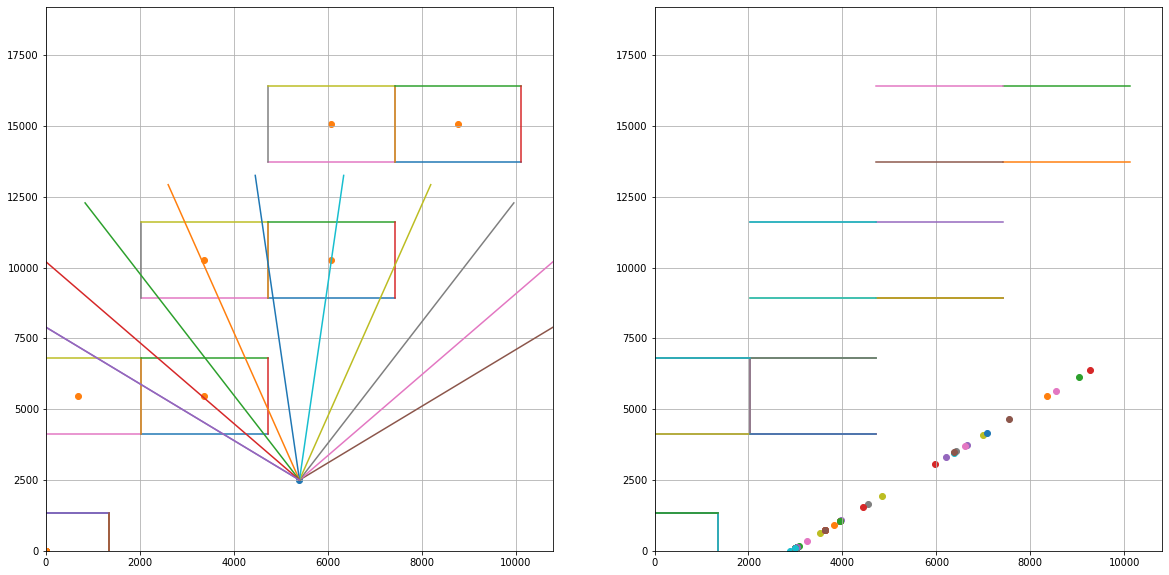

In [15]:
figure = plt.figure(figsize=(20, 10))
ax = plt.subplot(121)
ax.scatter(camera_origin[0], camera_origin[1])
ax.scatter(wall_centers_position_data_x, wall_centers_position_data_y)
for wall in wall_positions:
    l_b, r_b, l_t, r_t = wall
    ax.plot([l_b[0], r_b[0]], [l_b[1], r_b[1]])
    ax.plot([l_b[0], l_t[0]], [l_b[1], l_t[1]])
    ax.plot([r_t[0], l_t[0]], [r_t[1], l_t[1]])
    ax.plot([r_t[0], r_b[0]], [r_t[1], r_b[1]])
   
for ray in ray_from_camera:
    x, y, angle = ray
    rotation = math.pi/2
    ax.plot([camera_origin[0], (x*math.cos(rotation)-camera_origin[0]*math.cos(rotation))+(y*-math.sin(rotation)-camera_origin[1]*-math.sin(rotation) + camera_origin[0])], 
            [camera_origin[1], (x*math.sin(rotation)-camera_origin[0]*math.sin(rotation))+(y*math.cos(rotation)-camera_origin[1]*math.cos(rotation) + camera_origin[1])])
    
ax.set_xlim(0, w_size)
ax.set_ylim(0, h_size)
ax.grid(True)
ax = plt.subplot(122)
for wall in wall_to_print:
    first, second = wall
    xs = [first[0], second[0]]
    ys = [first[1], second[1]]
    ax.plot(xs, ys)
for inter in intersection:
    ax.scatter(inter[0], inter[1])
ax.set_xlim(0, w_size)
ax.set_ylim(0, h_size)
ax.grid(True)
plt.show()

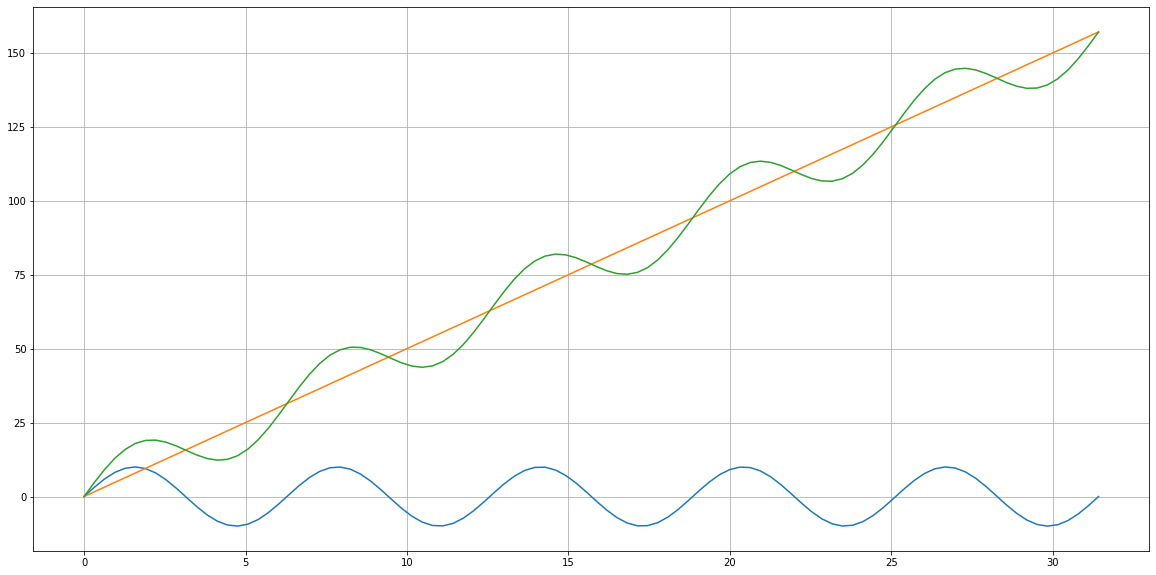

In [16]:
period_number = 5
full_time = period_number * math.pi*2
amplitude = 10
sample_size = 100
time_values = np.linspace(0, full_time, sample_size)
signal_values = [amplitude*math.sin(time_values[i]) for i in range(0, sample_size)]
trend_coef = 5
trend_values = [trend_coef*time_values[i] for i in range(0, sample_size)]
final_curve = [trend_values[i] + signal_values[i] for i in range(0, sample_size)]
figure = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.plot(time_values, signal_values)
ax.plot(time_values, trend_values)
ax.plot(time_values, final_curve)
ax.grid(True)

In [36]:
import importlib
import datetime 

#Load all settings from parameters
current_predicted_target_column = "y_pred"
current_real_target_column = "y_real"
current_python_modules = ["sklearn.metrics", "sklearn.metrics"]
current_python_class = ["mean_absolute_error", "mean_absolute_error"]
current_decorations_columns = ["meta"]
#To delete
data = [{'meta' : {'id' : 'test'}, 'y_pred' : 12, 'y_real' : 21} for _ in range(0, 10)]
current_input_data = pd.DataFrame(data)

#Only keep the first row decoration since it s the same for all
current_decoration = current_input_data.copy().loc[0, current_decorations_columns].tolist()
output = []

#Import classes
for module, class_name in zip(current_python_modules, current_python_class):
    current_evaluation_obj = getattr(importlib.import_module(module), class_name)
    #Perform Evaluation
    current_evaluation_result = current_evaluation_obj(current_input_data[current_real_target_column], current_input_data[current_predicted_target_column])
    current_record = {'metric' : 
                       {'class' : class_name, 
                        'modules' : module, 
                        'score' : current_evaluation_result
                       },
                   'event_timestamp' : str(datetime.datetime.utcnow())
                     }
    output.append(current_record)

df_output = pd.DataFrame(output)
m, n = df_output.shape 
meta_data = [current_decoration for _ in range(0, m)]
serie_meta_data = pd.DataFrame(meta_data)
serie_meta_data.columns = current_decorations_columns
df_output = pd.concat([df_output, serie_meta_data], axis=1)
df_output

,metric,event_timestamp,meta
0,"{'class': 'mean_absolute_error', 'modules': 's...",2021-03-10 15:24:58.212400,{'id': 'test'}
1,"{'class': 'mean_absolute_error', 'modules': 's...",2021-03-10 15:24:58.213068,{'id': 'test'}


In [10]:
serie_1 = pd.Series([1, 2, 3])
serie_2 = pd.Series([1, 2, 3])
result = pd.concat([serie_1, serie_2], axis=1).iloc[:, 0]
result

0    1
1    2
2    3
Name: 0, dtype: int64

In [78]:
ds = np.random.uniform(1, 100, 100)
ds.astype(int)
ds= ds.reshape(-1, 1)
df = pd.DataFrame(ds)
np.where(df[0]>=50, 1, 0)


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [22]:
import inspect

def this_is_a_test() -> None:
    "This function is a simple test"
    print('hello')
    
help(this_is_a_test)
inspect.signature(this_is_a_test)

Help on function this_is_a_test in module __main__:

this_is_a_test() -> None
    This function is a simple test



<Signature () -> None>

In [44]:
def decorator(f):
    def my_function(*args, **kargs):
        print("This is a {}".format("test"))
        to_return = f(*args, **kargs)
        return to_return
    return my_function

@decorator
def add(*args, **kargs):
    sum = 0
    for arg in args:
        sum = sum+arg
    return sum

add(10, 10, 10, 10)

This is a test


40

In [85]:
class Singleton:
    __singleton = None
    
    def __init__(self):
        pass
    
    @staticmethod
    def get_singleton():
        if(Singleton.__singleton == None):
            Singleton.__singleton = Singleton()

        return Singleton.__singleton
        
print(Singleton.get_singleton())
Singleton.__singleton = Singleton()
print(Singleton.get_singleton())